In [1]:
from lazylib import make, GoogleLeNetEE, device, takeConfusionMatrix, takeRocCurve, now, register, takeFromDisk
import torch

/home/luizp/projects/pibit/pibit/lib64/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
n = now()
epocs = 100
model = make(
    EPOCHS=epocs, 
    BATCH_SIZE=128, 
    LEARNING_RATE=1e-3, 
    csv_path="/home/luizp/projects/pibit/src/data/processed/csv/botClean.csv", 
    out_path=f'/home/luizp/Downloads/0proj/pibit/src/0utput/text/{n}',
    MODEL=GoogleLeNetEE(x=128).to(device()), 
    SEED=1701,
    xcol=2
    ) 
torch.save(model.state_dict(), f"/home/luizp/projects/pibit/src/0utput/models/{n}_alexnet_{epocs}.nnModel")

[27-07-2024 22-43-10] Epoch 001 Acc: 0.9965 Loss: 10.24580279: 100%|██████████| 391/391 [01:12<00:00,  5.36it/s]
[27-07-2024 22-45-45] Epoch 001 Val. Acc: 0.9990 Val. Loss: 0.00738951: 100%|██████████| 3516/3516 [02:34<00:00, 22.82it/s]
[27-07-2024 22-47-04] Epoch 002 Acc: 0.9991 Loss: 0.00588314: 100%|██████████| 391/391 [01:14<00:00,  5.27it/s]
[27-07-2024 22-49-41] Epoch 002 Val. Acc: 0.9990 Val. Loss: 0.00489326: 100%|██████████| 3516/3516 [02:35<00:00, 22.55it/s]
[27-07-2024 22-51-01] Epoch 003 Acc: 0.9991 Loss: 0.00284478: 100%|██████████| 391/391 [01:14<00:00,  5.26it/s]
[27-07-2024 22-53-37] Epoch 003 Val. Acc: 0.9999 Val. Loss: 0.00053339: 100%|██████████| 3516/3516 [02:35<00:00, 22.68it/s]
[27-07-2024 22-54-56] Epoch 004 Acc: 0.9999 Loss: 0.00027248: 100%|██████████| 391/391 [01:13<00:00,  5.29it/s]
[27-07-2024 22-57-29] Epoch 004 Val. Acc: 1.0000 Val. Loss: 0.00010787: 100%|██████████| 3516/3516 [02:32<00:00, 23.08it/s]
[27-07-2024 22-58-47] Epoch 005 Acc: 1.0000 Loss: 0.000

Finished experiment!


In [3]:
train = takeFromDisk(f'/home/luizp/Downloads/0proj/pibit/src/0utput/text/{n}-train--{epocs}.txt')
valid = takeFromDisk(f'/home/luizp/Downloads/0proj/pibit/src/0utput/text/{n}-valid--{epocs}.txt')

In [4]:
import numpy as np
from sklearn.metrics import auc, roc_curve, accuracy_score, ConfusionMatrixDisplay, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

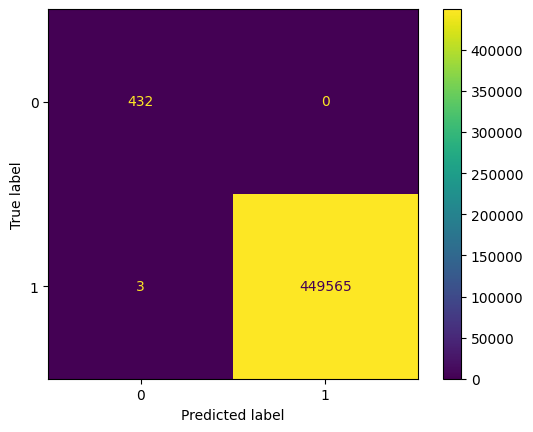

In [5]:
ConfusionMatrixDisplay(np.array(valid[0]['confusion_matrix'])).plot()

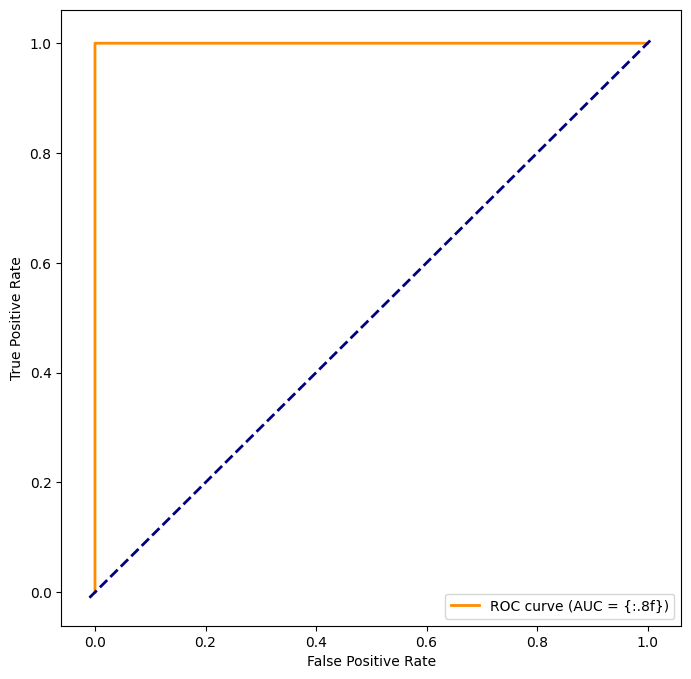

In [6]:
takeRocCurve(valid)